In [70]:
# Request to get the data approx 12000
import requests

all_products = []
page = 1
total_needed = 12000

while len(all_products) < total_needed:
  url = f"https://world.openfoodfacts.org/api/v2/search?categories=chocolates&fields=code,product_name,brands,nutriments&page_size=1000&page={page}"
  response = requests.get(url)
  data = response.json()
  all_products.extend(data['products'])
  page += 1

print(len(all_products))

12097


In [77]:
# Correcting name and get the records
import pandas as pd
import numpy as np

selected_list = []
for product in all_products:
    extracted = {
        'product_code': product.get('code'),
        'product_name': product.get('product_name'),
        'brand': product.get('brands'),
        'nutriments': product.get('nutriments')
    }
    selected_list.append(extracted)

df_selected = pd.DataFrame(selected_list)
display(df_selected.head())
display(df_selected.shape)

,product_code,product_name,brand,nutriments
0,6111035000430,Sidi Ali,Sidi Ali,"{'carbohydrates': 42, 'carbohydrates_100g': 4...."
1,6111242100992,Perly,Jaouda,"{'calcium': 0.25, 'calcium_100g': 0.25, 'calci..."
2,6111035002175,Sidi Ali,sidi ali,"{'chloride': 0.014, 'chloride_100g': 0.014, 'c..."
3,6111035000058,Eau minérale naturelle,"Les Eaux Minérales d'oulmès,Sidi Ali",{'fruits-vegetables-legumes-estimate-from-ingr...
4,6111252421568,اكوافينا,AQUAFINA,"{'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser..."


(12097, 4)

In [78]:
df_selected['nutriments']

0        {'carbohydrates': 42, 'carbohydrates_100g': 4....
1        {'calcium': 0.25, 'calcium_100g': 0.25, 'calci...
2        {'chloride': 0.014, 'chloride_100g': 0.014, 'c...
3        {'fruits-vegetables-legumes-estimate-from-ingr...
4        {'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...
                               ...                        
12092    {'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...
12093    {'carbohydrates': 57, 'carbohydrates_100g': 57...
12094    {'carbohydrates': 51, 'carbohydrates_100g': 51...
12095    {'carbohydrates': 38.9, 'carbohydrates_100g': ...
12096    {'carbohydrates': 0.7, 'carbohydrates_100g': 0...
Name: nutriments, Length: 12097, dtype: object

In [79]:
#Extract 'nutriments' data from the products
nutriments_raw = [product.get('nutriments', {}) for product in all_products]

#Convert list dictionaries into a DataFrame
nutriments_df = pd.DataFrame(nutriments_raw)

required_nutriments = [
    'energy-kcal_value',
    'energy-kj_value',
    'carbohydrates_value',
    'sugars_value',
    'fat_value',
    'saturated-fat_value',
    'proteins_value',
    'fiber_value',
    'salt_value',
    'sodium_value',
    'nova-group',
    'nutrition-score-fr',
    'fruits-vegetables-nuts-estimate-from-ingredients_100g'
]

#Filter DF to select only the required columns
filtered_nutriments_df = nutriments_df[required_nutriments]
display(filtered_nutriments_df.head())
display(filtered_nutriments_df.shape)

,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,0.0,20.0,42.0,14.0,0.0,0.0,0.0,0.0,0.00000,0.000000,NaN,1.0,0.0
1,97.0,406.0,9.4,NaN,3.0,NaN,8.0,NaN,NaN,NaN,3.0,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,26.000000,NaN,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,26.000000,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00508,0.002032,NaN,0.0,0.0


(12097, 13)

In [80]:
# Merge by concatenating the nutriments with products columns
df = pd.concat([df_selected, filtered_nutriments_df], axis=1)

# Display the first few rows and shape of the merged DataFrame
display(df.head())
display(df.shape)

,product_code,product_name,brand,nutriments,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,6111035000430,Sidi Ali,Sidi Ali,"{'carbohydrates': 42, 'carbohydrates_100g': 4....",0.0,20.0,42.0,14.0,0.0,0.0,0.0,0.0,0.00000,0.000000,NaN,1.0,0.0
1,6111242100992,Perly,Jaouda,"{'calcium': 0.25, 'calcium_100g': 0.25, 'calci...",97.0,406.0,9.4,NaN,3.0,NaN,8.0,NaN,NaN,NaN,3.0,NaN,0.0
2,6111035002175,Sidi Ali,sidi ali,"{'chloride': 0.014, 'chloride_100g': 0.014, 'c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,26.000000,NaN,0.0,0.0
3,6111035000058,Eau minérale naturelle,"Les Eaux Minérales d'oulmès,Sidi Ali",{'fruits-vegetables-legumes-estimate-from-ingr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,26.000000,1.0,0.0,0.0
4,6111252421568,اكوافينا,AQUAFINA,"{'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00508,0.002032,NaN,0.0,0.0


(12097, 17)

In [81]:
df.drop('nutriments', axis=1, inplace=True)

# Display
display(df.head())

,product_code,product_name,brand,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,6111035000430,Sidi Ali,Sidi Ali,0.0,20.0,42.0,14.0,0.0,0.0,0.0,0.0,0.00000,0.000000,NaN,1.0,0.0
1,6111242100992,Perly,Jaouda,97.0,406.0,9.4,NaN,3.0,NaN,8.0,NaN,NaN,NaN,3.0,NaN,0.0
2,6111035002175,Sidi Ali,sidi ali,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,26.000000,NaN,0.0,0.0
3,6111035000058,Eau minérale naturelle,"Les Eaux Minérales d'oulmès,Sidi Ali",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,26.000000,1.0,0.0,0.0
4,6111252421568,اكوافينا,AQUAFINA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00508,0.002032,NaN,0.0,0.0


In [82]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12097 entries, 0 to 12096
Data columns (total 16 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   product_code                                           12097 non-null  object 
 1   product_name                                           11829 non-null  object 
 2   brand                                                  11545 non-null  object 
 3   energy-kcal_value                                      11314 non-null  float64
 4   energy-kj_value                                        6468 non-null   float64
 5   carbohydrates_value                                    11314 non-null  float64
 6   sugars_value                                           11098 non-null  float64
 7   fat_value                                              11342 non-null  float64
 8   saturated-fat_value                           

None

In [83]:
df['product_code'] = df['product_code'].astype(int)

In [84]:
# Find all rows where 'product_code' is duplicated (including all occurrences)
duplicates = df[df.duplicated(subset='product_code', keep=False)]
display(duplicates)


,product_code,product_name,brand,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g


In [85]:
df.drop_duplicates(subset='product_code', keep='first', inplace=True)

In [86]:
df['product_code'] = df['product_code'].astype(object)

In [87]:
df.shape

(12097, 16)

In [88]:
# Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each Columns

count = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])
missing_data

,Count,Percentage
energy-kj_value,5629,46.532198
fiber_value,3848,31.809540
nutrition-score-fr,1704,14.086137
nova-group,1287,10.639001
salt_value,1089,9.002232
sodium_value,1089,9.002232
saturated-fat_value,1065,8.803836
sugars_value,999,8.258246
carbohydrates_value,783,6.472679
energy-kcal_value,783,6.472679


In [89]:
# Find rows where 'energy-kj_value' is null
null_energy_kj = df[df['energy-kj_value'].isnull()]

# Display rows with null 'energy-kj_value' and show the 'energy-kcal_value' column
display(null_energy_kj[['energy-kj_value', 'energy-kcal_value']])

,energy-kj_value,energy-kcal_value
2,NaN,NaN
3,NaN,NaN
8,NaN,58.000000
12,NaN,0.000000
14,NaN,101.000000
...,...,...
12085,NaN,375.000000
12087,NaN,465.000000
12088,NaN,417.000000
12095,NaN,296.000000


In [90]:
# Conversion factor
kcal_to_kj = 4.184

# Update 'energy-kj_value' where it's null and 'energy-kcal_value' is not null
df.loc[df['energy-kj_value'].isnull() & df['energy-kcal_value'].notnull(), 'energy-kj_value'] = \
    df['energy-kcal_value'] * kcal_to_kj


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12097 entries, 0 to 12096
Data columns (total 16 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   product_code                                           12097 non-null  object 
 1   product_name                                           11829 non-null  object 
 2   brand                                                  11545 non-null  object 
 3   energy-kcal_value                                      11314 non-null  float64
 4   energy-kj_value                                        11368 non-null  float64
 5   carbohydrates_value                                    11314 non-null  float64
 6   sugars_value                                           11098 non-null  float64
 7   fat_value                                              11342 non-null  float64
 8   saturated-fat_value                           

In [92]:
# identify the null columns of both product_name & brand
null_rows = df[df['product_name'].isnull() & df['brand'].isnull()]
display(null_rows)

,product_code,product_name,brand,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g
239,6111246651261,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,6111259347021,None,None,522.0,2184.048,66.0,37.00,26.0,15.0,5.8,NaN,0.75,0.3,4.0,29.0,0.0
312,6111259093140,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
368,6111262821150,None,None,583.0,2434.000,24.8,2.75,48.2,9.9,24.3,0.0,1.25,0.5,4.0,11.0,73.0
472,6111259733749,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12062,6111243510547,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12063,6111250476959,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12064,6111128001351,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12065,6111270420024,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN


In [93]:
#dropped the null column
df = df.dropna(subset=['product_name', 'brand'], how='all')
display(df.shape)

(11881, 16)

Update the missing product_name & brand. It works by looking in the brand column and then searching for the correct product name in other rows, then it will update same for product name column as well

In [96]:
#display the null values in two rows
null_rows = df[df['product_name'].isnull()]
display(null_rows[['product_code', 'product_name', 'brand']])

#null_rows = df[df['product_name'].isnull() | (df['product_name'] == '')]
#display(null_rows[['product_code', 'product_name', 'brand']])


,product_code,product_name,brand
430,6111242882263,None,رفيع
761,6111266962675,None,Ladid
1372,6111099000179,None,Lousra
1652,5449000311856,None,"Coca-Cola, Coca-Cola Company"
2430,3400938267266,None,Pipas de la casa
2780,6111250471572,None,La Délicieuse
4003,6111246722084,None,Cream cheese
4877,6111258520012,None,Rifnuts
4880,6111271590504,None,Wedo
6912,5285001952274,None,SADAPACK


In [95]:
# Product_name
# Fill missing product_name by using the first available product_name within each brand group
df.loc[:, 'product_name'] = df['product_name'].fillna(
    df.groupby('brand')['product_name'].transform('first')
)

# Display rows where product_name was originally missing (optional)
missing_product_name = df['product_name'].isnull() & df['brand'].notnull()
display(df[missing_product_name])

,product_code,product_name,brand,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g
430,6111242882263,None,رفيع,45.0,188.280,4.80,NaN,1.5,NaN,3.2,NaN,NaN,NaN,4.0,NaN,58.333333
761,6111266962675,None,Ladid,270.0,888.400,7.60,7.6,16.5,11.5,7.4,NaN,3.25,1.30,NaN,27.0,NaN
1372,6111099000179,None,Lousra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1652,5449000311856,None,"Coca-Cola, Coca-Cola Company",27.5,117.000,6.66,6.0,NaN,NaN,NaN,NaN,42.00,16.80,4.0,NaN,3.000000
2430,3400938267266,None,Pipas de la casa,888.0,255.000,8989.00,895.0,554.0,595.0,597.0,8909.0,898.00,359.20,3.0,50.0,0.000000
2780,6111250471572,None,La Délicieuse,NaN,1008.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4003,6111246722084,None,Cream cheese,100.0,418.400,1.00,1.0,10.0,6.0,2.0,0.0,237.50,95.00,3.0,15.0,0.000000
4877,6111258520012,None,Rifnuts,300.0,1255.200,10.00,NaN,25.0,3.5,10.0,NaN,1.75,0.70,NaN,NaN,0.000000
4880,6111271590504,None,Wedo,50.0,209.200,55.00,20.0,35.0,40.0,30.0,86.0,150.00,60.00,4.0,NaN,0.000000
6912,5285001952274,None,SADAPACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# BRAND
# Fill missing product_name by using the first available product_name for each brand
df.loc[:, 'brand'] = df['brand'].fillna(
    df.groupby('product_name')['brand'].transform('first')
)
# Display rows where product_name was originally missing (if needed, use before the fill)
missing_product_name = df['brand'].isnull() & df['product_name'].notnull()
display(df[missing_product_name])

,product_code,product_name,brand,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g
154,6111214004747,Pipas,None,520.0,2177.000,38.9,1.65,29.0,3.36,24.60,2.7,0.059,0.0236,3.0,-5.0,0.00000
166,6111245591063,Dalaa 550 feuilles,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
196,7322540548563,jempo,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279,6111266962446,6111266962446,None,167.8,703.900,NaN,20.00,7.4,4.80,5.30,NaN,0.000,0.0000,4.0,11.0,0.00000
280,6111180003102,Mayfine,None,356.0,1489.504,85.0,0.00,0.6,0.00,0.45,0.0,0.071,0.0284,3.0,4.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,88882222,Eau de Coco,None,12.0,50.208,3.2,3.20,0.0,0.00,0.00,NaN,0.003,0.0012,NaN,3.0,NaN
11996,8411414010240,Boer,None,528.0,2209.152,62.0,32.00,29.0,15.00,4.00,NaN,0.070,0.0280,NaN,25.0,NaN
12020,434973,Butternut Squash & Sage Ravioli,None,206.0,861.904,26.2,2.50,7.8,3.10,6.40,NaN,0.600,0.2400,4.0,5.0,35.03125
12025,6111266960718,Muscly,None,264.0,1104.576,7.0,0.00,22.0,15.00,9.00,NaN,1.600,0.6400,NaN,17.0,NaN


In [98]:
df.shape

(11881, 16)

In [99]:
#Convert column to lowercase
df['product_name'] = df['product_name'].str.lower()
df['brand'] = df['brand'].str.lower()

# Display
display(df[['product_name', 'brand']])

,product_name,brand
0,sidi ali,sidi ali
1,perly,jaouda
2,sidi ali,sidi ali
3,eau minérale naturelle,"les eaux minérales d'oulmès,sidi ali"
4,اكوافينا,aquafina
...,...,...
12092,100% pur jus orange sans pulpe,"paquito, sélection intermarché"
12093,crunchy,carrefour
12094,brioche tranchée,"marque repère, épi d'or"
12095,extrême original - vanille pépites de nougatine,nestlé


In [100]:
# Drop duplicate rows based after making into lower
df = df.drop_duplicates(subset=['product_code','product_name','brand'], keep='first').reset_index(drop=True)

In [101]:
df.shape

(11881, 16)

In [102]:
#display the null values in two rows

null_rows = df[df['product_name'].isnull() | (df['product_name'] == '')]
display(null_rows[['product_code', 'product_name', 'brand']])

,product_code,product_name,brand
14,6111242100985,,jaouda
16,6111099003897,,lilia
38,6111128000460,,aïn saiss
43,20005733,,alesto
58,8425197712024,,maruja
...,...,...,...
11620,8410376052633,,gullón
11721,168069,,marks & spencer
11788,4056489774747,,mcennedy
11830,5711953176616,None,"arla foods, arla"


In [105]:
# Columns to check (all columns except the three specified)
cols_to_check = df.columns.difference(['product_code','product_name', 'brand'])

# Find rows where all these columns are NaN
rows_all_nan_except = df[df[cols_to_check].isnull().all(axis=1)]
display(rows_all_nan_except)

,product_code,product_name,brand,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g


In [104]:
# Columns to check (all except the three specified)
cols_to_check = df.columns.difference(['product_code', 'product_name', 'brand'])

# Identify rows to drop where all those columns are NaN
rows_to_drop = df[df[cols_to_check].isnull().all(axis=1)].index
df = df.drop(rows_to_drop).reset_index(drop=True)

CHECKING THE ROWS WHICH HAS SPACES FOR THE FIRST 3 ROWS

In [106]:
rows_with_missing = df[
    (df['product_name'].isnull() | (df['product_name'].str.strip() == '')) |
    (df['brand'].isnull() | (df['brand'].str.strip() == ''))
]

display(rows_with_missing)

,product_code,product_name,brand,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g
14,6111242100985,,jaouda,101.0,422.584,4.2,0.0,6.0,0.0,7.6,0.0,0.00,0.000,1.0,-2.0,0.00000
16,6111099003897,,lilia,675.0,2824.200,0.2,0.0,75.0,34.0,0.1,0.0,0.50,0.200,NaN,18.0,0.00000
26,6111180000231,levure pâtisserie,,183.0,766.000,43.4,0.0,0.0,0.0,0.0,0.0,0.00,0.000,4.0,2.0,0.00000
38,6111128000460,,aïn saiss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.008,1.0,0.0,0.00000
43,20005733,,alesto,712.0,2979.008,3.7,0.9,69.1,2.0,15.5,2.0,0.01,0.004,1.0,-6.0,100.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11602,8411414010240,boer,None,528.0,2209.152,62.0,32.0,29.0,15.0,4.0,NaN,0.07,0.028,NaN,25.0,NaN
11626,434973,butternut squash & sage ravioli,None,206.0,861.904,26.2,2.5,7.8,3.1,6.4,NaN,0.60,0.240,4.0,5.0,35.03125
11631,6111266960718,muscly,None,264.0,1104.576,7.0,0.0,22.0,15.0,9.0,NaN,1.60,0.640,NaN,17.0,NaN
11638,5711953176616,None,"arla foods, arla",43.0,179.000,7.3,3.1,0.9,0.1,0.9,1.0,0.10,0.040,4.0,5.0,0.00000


In [107]:
# Identify and drop rows where 'product_name' or 'brand' is null or empty string
rows_to_drop = df[
    (df['product_name'].isnull() | (df['product_name'].str.strip() == '')) |
    (df['brand'].isnull() | (df['brand'].str.strip() == ''))
].index

df = df.drop(rows_to_drop).reset_index(drop=True)

In [108]:
df.shape

(11128, 16)

In [109]:
df.isnull().sum()

product_code                                                0
product_name                                                0
brand                                                       0
energy-kcal_value                                         321
energy-kj_value                                           275
carbohydrates_value                                       312
sugars_value                                              516
fat_value                                                 294
saturated-fat_value                                       583
proteins_value                                            302
fiber_value                                              3138
salt_value                                                594
sodium_value                                              594
nova-group                                                739
nutrition-score-fr                                       1136
fruits-vegetables-nuts-estimate-from-ingredients_100g     265
dtype: i

mean,median,max

In [110]:
import numpy as np
# Example columns to analyze and update
columns = ['fiber_value']

# Calculate mean, min, max for each column and update nulls with mean
for col in columns:
    col_mean = df[col].mean()
    col_median = df[col].median()
    col_max = df[col].max()
    col_min = df[col].min()

    print(f"Column: {col} - Mean: {col_mean}, Median: {col_median}, Max: {col_max}, Min: {col_min}")

    #df[col] = df[col].apply(lambda x: col_mean if np.isnan(x) else x)

Column: fiber_value - Mean: 764861344.2025067, Median: 2.5, Max: 6111242106933.0, Min: 0.0


In [111]:
import numpy as np

# Columns to fill with mean
mean_columns = ['energy-kcal_value', 'energy-kj_value', 'carbohydrates_value', 'sugars_value','fat_value', 'saturated-fat_value','nutrition-score-fr']

# Columns to fill with median
median_columns = ['proteins_value','fiber_value','salt_value', 'sodium_value', 'nova-group','fruits-vegetables-nuts-estimate-from-ingredients_100g']

# Fill NaN and 0 in mean columns with mean
for col in mean_columns:
    mean_val = df[col].replace(0, np.nan).mean()
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(mean_val)

# Fill NaN and 0 in median columns with median
for col in median_columns:
    median_val = df[col].replace(0, np.nan).median()
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(median_val)


In [112]:
# Round all numeric columns in the DataFrame to 1 decimal place
df = df.round(1)

# OR to round specific columns only:
columns_to_round = [
    'energy-kcal_value',
    'energy-kj_value',
    'carbohydrates_value',
    'sugars_value',
    'fat_value',
    'saturated-fat_value',
    'proteins_value',
    'fiber_value',
    'salt_value',
    'sodium_value',
    'nova-group',
    'nutrition-score-fr',
    'fruits-vegetables-nuts-estimate-from-ingredients_100g'
]
df[columns_to_round] = df[columns_to_round].round(1)
display(df)

,product_code,product_name,brand,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,6111035000430,sidi ali,sidi ali,283.7,20.0,42.0,14.0,16.1,5.7,6.2,3.3,0.5,0.2,4.0,1.0,20.0
1,6111242100992,perly,jaouda,97.0,406.0,9.4,12.3,3.0,5.7,8.0,3.3,0.5,0.2,3.0,9.6,20.0
2,6111035002175,sidi ali,sidi ali,283.7,1164.7,30.3,12.3,16.1,5.7,6.2,3.3,65.0,26.0,4.0,9.6,20.0
3,6111035000058,eau minérale naturelle,"les eaux minérales d'oulmès,sidi ali",283.7,1164.7,30.3,12.3,16.1,5.7,6.2,3.3,65.0,26.0,1.0,9.6,20.0
4,6111252421568,اكوافينا,aquafina,283.7,1164.7,30.3,12.3,16.1,5.7,6.2,3.3,0.0,0.0,4.0,9.6,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,3250390769811,100% pur jus orange sans pulpe,"paquito, sélection intermarché",42.0,179.0,9.2,8.2,0.5,0.1,0.7,0.5,0.0,0.0,1.0,4.0,100.0
11124,3560070581870,crunchy,carrefour,428.0,1791.0,57.0,5.0,15.0,2.9,11.0,14.0,0.1,0.0,4.0,-1.0,20.0
11125,3564700562802,brioche tranchée,"marque repère, épi d'or",341.0,1442.0,51.0,13.0,11.0,3.8,8.6,2.2,0.8,0.3,4.0,14.0,20.0
11126,7613034975386,extrême original - vanille pépites de nougatine,nestlé,296.0,1238.5,38.9,29.0,14.0,10.0,3.4,0.9,0.1,0.1,4.0,20.0,0.9


In [113]:
import pandas as pd

nun_rows = df[df.isna().any(axis=1)]
display(nun_rows)

,product_code,product_name,brand,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g


In [114]:
# Calculate sugar to carbohydrate ratio
df['sugar_to_carb_ratio'] = df['sugars_value'] / df['carbohydrates_value']
df['sugar_to_carb_ratio'] = df['sugar_to_carb_ratio'].replace([np.inf, -np.inf], np.nan)  # Handle division by zero

# Define calorie categories based on energy-kcal_value
def calorie_category(value):
    if value <= 100:
        return 'Low'
    elif value <= 250:
        return 'Moderate'
    else:
        return 'High'

df['calorie_category'] = df['energy-kcal_value'].apply(calorie_category)

# Define sugar categories based on sugars_value
def sugar_category(value):
    if value <= 5:
        return 'Low Sugar'
    elif value <= 15:
        return 'Moderate Sugar'
    else:
        return 'High Sugar'

df['sugar_category'] = df['sugars_value'].apply(sugar_category)

# Flag ultra-processed products based on nova-group column
#df['is_ultra_processed'] = df['nova-group'].apply(lambda x: 'Yes' if str(x) == '4' else 'No')

df['is_ultra_processed'] = df['nova-group'] == 4
df['is_ultra_processed'] = df['is_ultra_processed'].apply(lambda x: 'Yes' if x else 'No')


# Display or save the updated DataFrame
display(df[['sugar_to_carb_ratio', 'calorie_category', 'sugar_category', 'is_ultra_processed']].head())

,sugar_to_carb_ratio,calorie_category,sugar_category,is_ultra_processed
0,0.333333,High,Moderate Sugar,Yes
1,1.308511,Low,Moderate Sugar,No
2,0.405941,High,Moderate Sugar,Yes
3,0.405941,High,Moderate Sugar,No
4,0.405941,High,Moderate Sugar,Yes


In [115]:
# Round all numeric columns in the DataFrame to 1 decimal place
df = df.round(1)

# OR to round specific columns only:
columns_to_round = ['sugar_to_carb_ratio']
df[columns_to_round] = df[columns_to_round].round(1)
display(df)

,product_code,product_name,brand,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g,sugar_to_carb_ratio,calorie_category,sugar_category,is_ultra_processed
0,6111035000430,sidi ali,sidi ali,283.7,20.0,42.0,14.0,16.1,5.7,6.2,3.3,0.5,0.2,4.0,1.0,20.0,0.3,High,Moderate Sugar,Yes
1,6111242100992,perly,jaouda,97.0,406.0,9.4,12.3,3.0,5.7,8.0,3.3,0.5,0.2,3.0,9.6,20.0,1.3,Low,Moderate Sugar,No
2,6111035002175,sidi ali,sidi ali,283.7,1164.7,30.3,12.3,16.1,5.7,6.2,3.3,65.0,26.0,4.0,9.6,20.0,0.4,High,Moderate Sugar,Yes
3,6111035000058,eau minérale naturelle,"les eaux minérales d'oulmès,sidi ali",283.7,1164.7,30.3,12.3,16.1,5.7,6.2,3.3,65.0,26.0,1.0,9.6,20.0,0.4,High,Moderate Sugar,No
4,6111252421568,اكوافينا,aquafina,283.7,1164.7,30.3,12.3,16.1,5.7,6.2,3.3,0.0,0.0,4.0,9.6,20.0,0.4,High,Moderate Sugar,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,3250390769811,100% pur jus orange sans pulpe,"paquito, sélection intermarché",42.0,179.0,9.2,8.2,0.5,0.1,0.7,0.5,0.0,0.0,1.0,4.0,100.0,0.9,Low,Moderate Sugar,No
11124,3560070581870,crunchy,carrefour,428.0,1791.0,57.0,5.0,15.0,2.9,11.0,14.0,0.1,0.0,4.0,-1.0,20.0,0.1,High,Low Sugar,Yes
11125,3564700562802,brioche tranchée,"marque repère, épi d'or",341.0,1442.0,51.0,13.0,11.0,3.8,8.6,2.2,0.8,0.3,4.0,14.0,20.0,0.3,High,Moderate Sugar,Yes
11126,7613034975386,extrême original - vanille pépites de nougatine,nestlé,296.0,1238.5,38.9,29.0,14.0,10.0,3.4,0.9,0.1,0.1,4.0,20.0,0.9,0.7,High,High Sugar,Yes


In [116]:
import pandas as pd

nun_rows = df[df.isna().any(axis=1)]
display(nun_rows)

,product_code,product_name,brand,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g,sugar_to_carb_ratio,calorie_category,sugar_category,is_ultra_processed
628,7613035866386,contrex eau minérale naturelle,contrex,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.3,0.0,0.0,4.0,9.6,20.0,NaN,Low,Low Sugar,Yes
1058,3073780918763,babybel,babybel,295.0,1225.0,0.0,0.0,23.0,15.5,22.0,3.3,1.7,0.7,3.0,14.0,20.0,NaN,High,Low Sugar,No
1510,41500007229,mostassa groga clàssica,french's,0.0,0.0,0.0,12.3,0.0,5.7,0.0,3.3,0.0,0.0,4.0,9.6,20.0,NaN,Low,Moderate Sugar,Yes
1575,3073780828628,mini babybel original,bel,59.0,246.9,0.0,0.0,4.6,3.1,4.4,3.3,0.3,0.1,3.0,14.0,20.0,NaN,Low,Low Sugar,No
1767,8719200251649,planta fin tartine et cuisson,planta fin,53.1,222.2,0.0,0.0,5.9,2.2,0.0,3.3,0.0,0.0,4.0,12.0,31.1,NaN,Low,Low Sugar,Yes
1806,3179730115821,contrex eau minérale naturelle 1l,contrex,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.3,0.0,0.0,4.0,9.6,20.0,NaN,Low,Low Sugar,Yes
2406,4001954165018,kerrygold extra ungesalzen,"kerrygold,ornua deutschland",17.7,73.9,0.0,0.0,2.0,1.0,0.0,3.3,0.5,0.2,2.0,18.0,13.0,NaN,Low,Low Sugar,No
3225,5000442007617,frylight sunflower oil spray 190ml,frylight,1.0,4.2,0.0,12.3,0.1,5.7,6.2,3.3,0.5,0.2,4.0,9.6,20.0,NaN,Low,Moderate Sugar,Yes
3992,3073781081909,mini light,babybel,42.0,175.7,0.0,0.0,2.4,1.6,5.0,3.3,0.4,0.1,3.0,10.0,20.0,NaN,Low,Low Sugar,No
4161,3073780225960,babybel,babybel,59.0,246.9,0.0,0.0,4.6,3.1,4.4,3.3,0.3,0.1,3.0,14.0,20.0,NaN,Low,Low Sugar,No


In [117]:
df = df.dropna()
df.shape

(11112, 20)

In [118]:
rows_with_zero = df[(df == 0.0).any(axis=1)]

display(rows_with_zero)

,product_code,product_name,brand,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g,sugar_to_carb_ratio,calorie_category,sugar_category,is_ultra_processed
4,6111252421568,اكوافينا,aquafina,283.7,1164.7,30.3,12.3,16.1,5.7,6.2,3.3,0.0,0.0,4.0,9.6,20.0,0.4,High,Moderate Sugar,Yes
12,6111035000027,6111035000027,sidi ali,283.7,1164.7,30.3,12.3,16.1,5.7,6.2,3.3,0.0,0.0,4.0,9.6,20.0,0.4,High,Moderate Sugar,Yes
13,50184453,marmite yeast extract,"marmite,unilever",260.0,1100.0,30.0,1.2,0.5,0.1,34.0,3.3,10.8,4.3,4.0,23.0,0.7,0.0,High,Low Sugar,Yes
19,3046920028004,excellence 70% cocoa intense dark,lindt,566.0,2350.0,34.0,30.0,41.0,24.0,9.5,3.3,0.1,0.0,3.0,25.0,20.0,0.9,High,High Sugar,No
21,3017620425035,nutella,ferrero,539.0,2252.0,57.5,56.3,30.9,10.6,6.3,3.3,0.1,0.0,4.0,31.0,13.0,1.0,High,High Sugar,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,3111900350557,muesli croustillant framboise & chocolat,favrichon,465.0,1945.6,56.0,19.0,20.0,7.2,10.0,11.0,0.0,0.0,3.0,12.0,3.0,0.3,High,High Sugar,No
11120,3270190020288,beurre gastronomique doux,"cmi (carrefour marchandises internationales), ...",743.0,3056.0,0.6,0.6,82.0,55.0,0.7,0.5,0.0,0.0,2.0,20.0,20.0,1.0,High,Low Sugar,No
11123,3250390769811,100% pur jus orange sans pulpe,"paquito, sélection intermarché",42.0,179.0,9.2,8.2,0.5,0.1,0.7,0.5,0.0,0.0,1.0,4.0,100.0,0.9,Low,Moderate Sugar,No
11124,3560070581870,crunchy,carrefour,428.0,1791.0,57.0,5.0,15.0,2.9,11.0,14.0,0.1,0.0,4.0,-1.0,20.0,0.1,High,Low Sugar,Yes


In [119]:
# Keep only rows where no column has 0.0
df_no_zero = df[~(df == 0.0).any(axis=1)]

# Or to drop these rows in place:
df.drop(df[(df == 0.0).any(axis=1)].index, inplace=True)


In [120]:
df.shape

(7249, 20)

Rename the column

In [121]:

df.rename(columns={
    'energy-kcal_value': 'energy_kcal_value',
    'energy-kj_value': 'energy_kj_value',
    'saturated-fat_value': 'saturated_fat_value',
    'nova-group': 'nova_group',
    'nutrition-score-fr': 'nutrition_score_fr',
    'fruits-vegetables-nuts-estimate-from-ingredients_100g': 'fruits_vegetables_nuts_estimate_from_ingredients_100g'
}, inplace=True)

missing = [c for c in ['product_name','brand','energy_kcal_value','energy_kj_value','carbohydrates_value','sugars_value','fat_value','saturated_fat_value','proteins_value','fiber_value','salt_value','sodium_value','nova_group','nutrition_score_fr','fruits_vegetables_nuts_estimate_from_ingredients_100g','sugar_to_carb_ratio','calorie_category','sugar_category','is_ultra_processed'] if c not in df.columns]
print('Missing:', missing)

df = df.dropna()
display(df.head())

Missing: []


,product_code,product_name,brand,energy_kcal_value,energy_kj_value,carbohydrates_value,sugars_value,fat_value,saturated_fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova_group,nutrition_score_fr,fruits_vegetables_nuts_estimate_from_ingredients_100g,sugar_to_carb_ratio,calorie_category,sugar_category,is_ultra_processed
0,6111035000430,sidi ali,sidi ali,283.7,20.0,42.0,14.0,16.1,5.7,6.2,3.3,0.5,0.2,4.0,1.0,20.0,0.3,High,Moderate Sugar,Yes
1,6111242100992,perly,jaouda,97.0,406.0,9.4,12.3,3.0,5.7,8.0,3.3,0.5,0.2,3.0,9.6,20.0,1.3,Low,Moderate Sugar,No
2,6111035002175,sidi ali,sidi ali,283.7,1164.7,30.3,12.3,16.1,5.7,6.2,3.3,65.0,26.0,4.0,9.6,20.0,0.4,High,Moderate Sugar,Yes
3,6111035000058,eau minérale naturelle,"les eaux minérales d'oulmès,sidi ali",283.7,1164.7,30.3,12.3,16.1,5.7,6.2,3.3,65.0,26.0,1.0,9.6,20.0,0.4,High,Moderate Sugar,No
5,6111266962187,lait,jaouda,45.0,188.0,4.9,12.3,1.5,1.0,3.1,3.3,0.2,0.1,3.0,-3.0,20.0,2.5,Low,Moderate Sugar,No


In [122]:
import pandas as pd

nan_rows = df[df.isna().any(axis=1)]
display(nan_rows)
#df.isnull().sum() 

,product_code,product_name,brand,energy_kcal_value,energy_kj_value,carbohydrates_value,sugars_value,fat_value,saturated_fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova_group,nutrition_score_fr,fruits_vegetables_nuts_estimate_from_ingredients_100g,sugar_to_carb_ratio,calorie_category,sugar_category,is_ultra_processed


In [123]:
df.to_csv('Choco_Analysis3.csv', index=False)

In [124]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


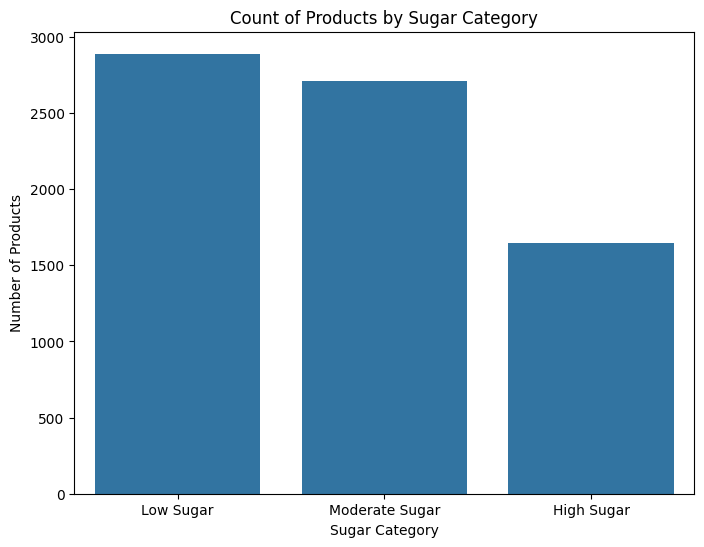

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='sugar_category', order=df['sugar_category'].value_counts().index)
plt.title('Count of Products by Sugar Category')
plt.xlabel('Sugar Category')
plt.ylabel('Number of Products')
plt.show()


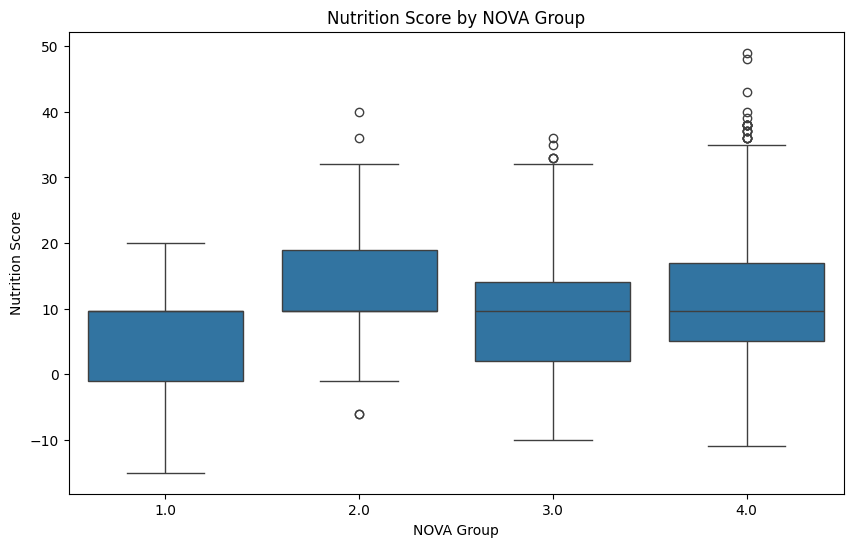

In [126]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='nova_group', y='nutrition_score_fr')
plt.title('Nutrition Score by NOVA Group')
plt.xlabel('NOVA Group')
plt.ylabel('Nutrition Score')
plt.show()


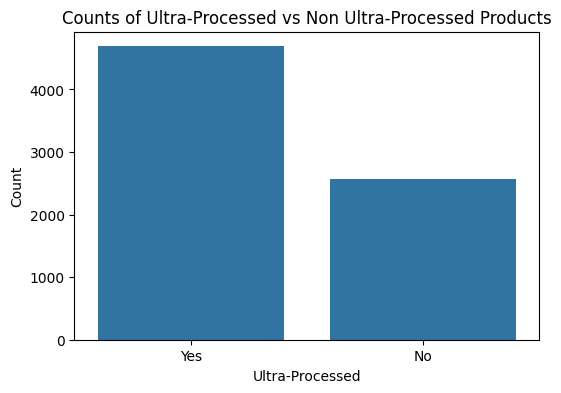

In [127]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='is_ultra_processed')
plt.title('Counts of Ultra-Processed vs Non Ultra-Processed Products')
plt.xlabel('Ultra-Processed')
plt.ylabel('Count')
plt.show()


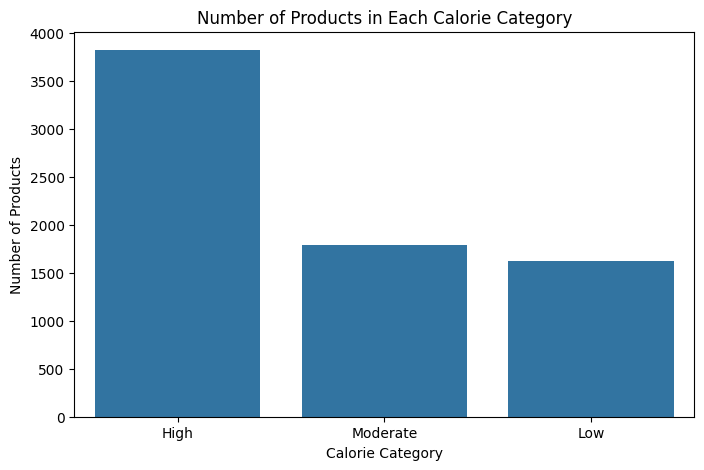

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart: Number of products in each calorie_category
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='calorie_category', order=df['calorie_category'].value_counts().index)
plt.title('Number of Products in Each Calorie Category')
plt.xlabel('Calorie Category')
plt.ylabel('Number of Products')
plt.show()

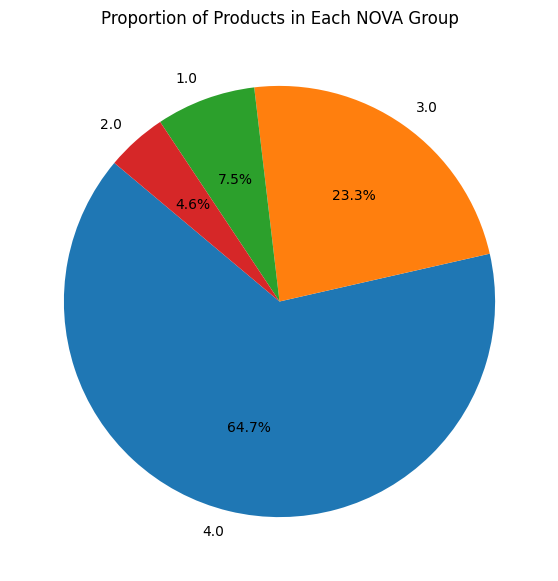

In [129]:
# Pie chart: Proportion of products in each nova-group
nova_counts = df['nova_group'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(nova_counts, labels=nova_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Products in Each NOVA Group')
plt.show()

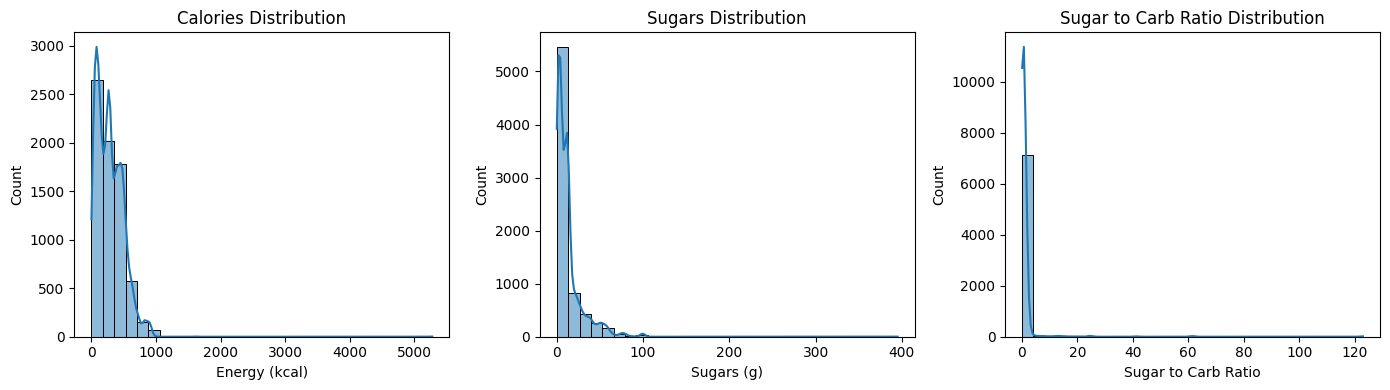

In [130]:
# Histograms: Distribution of calories, sugars, and sugar-to-carb ratio
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.histplot(df['energy_kcal_value'], bins=30, kde=True)
plt.title('Calories Distribution')
plt.xlabel('Energy (kcal)')

plt.subplot(1,3,2)
sns.histplot(df['sugars_value'], bins=30, kde=True)
plt.title('Sugars Distribution')
plt.xlabel('Sugars (g)')

plt.subplot(1,3,3)
sns.histplot(df['sugar_to_carb_ratio'], bins=30, kde=True)
plt.title('Sugar to Carb Ratio Distribution')
plt.xlabel('Sugar to Carb Ratio')

plt.tight_layout()
plt.show()

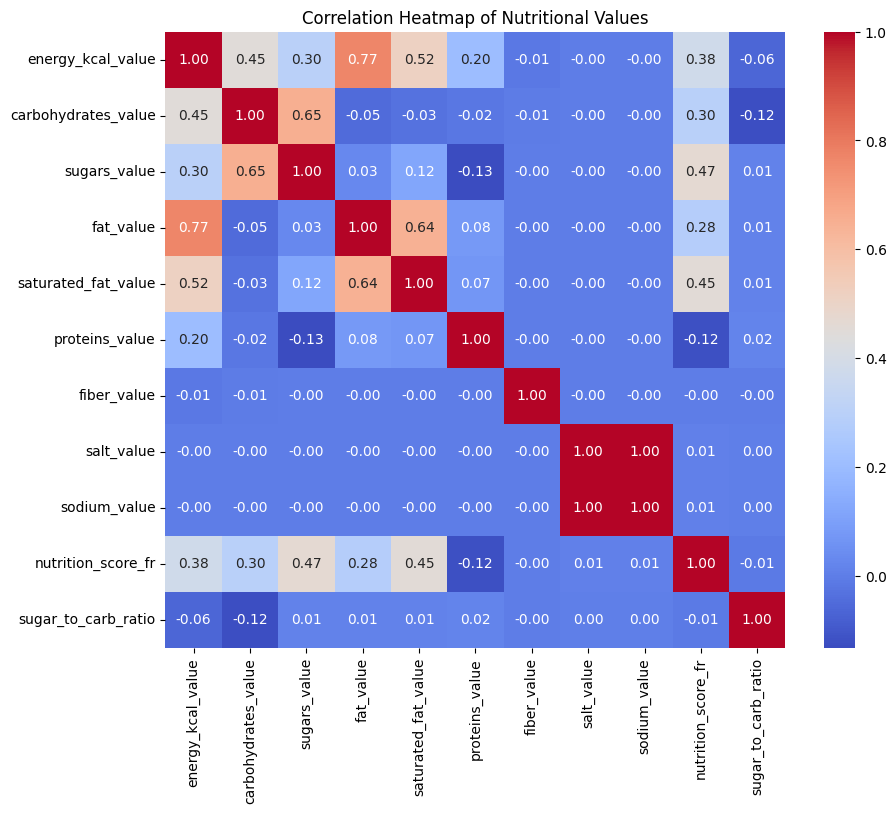

In [131]:
# Heatmap: Correlations between numerical nutritional values
numeric_cols = ['energy_kcal_value', 'carbohydrates_value', 'sugars_value', 'fat_value', 'saturated_fat_value', 'proteins_value', 'fiber_value', 'salt_value', 'sodium_value', 'nutrition_score_fr', 'sugar_to_carb_ratio']
plt.figure(figsize=(10,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Nutritional Values')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_860\3854201299.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_avg_calories.values, y=top_avg_calories.index, palette='viridis')


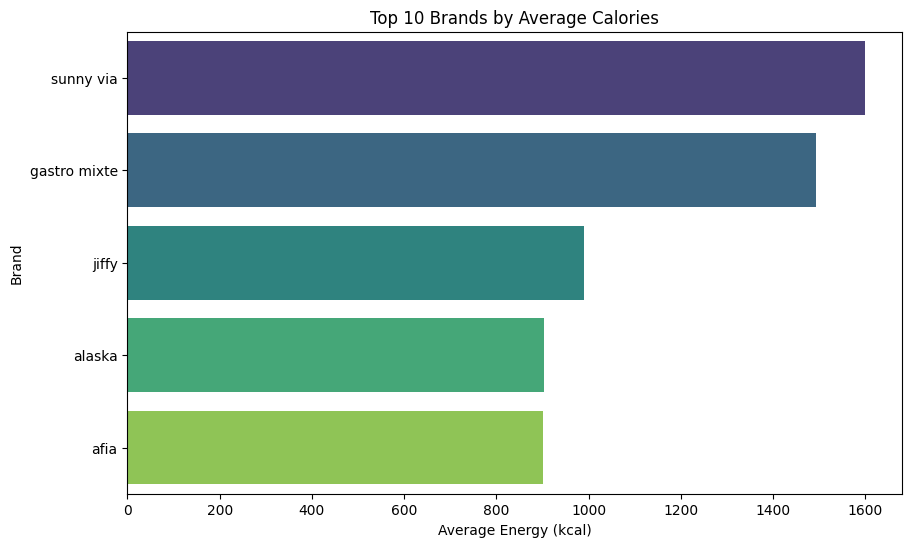

In [132]:
# Top N bar plots: Brands with highest average calories (Top 10)
top_avg_calories = df.groupby('brand')['energy_kcal_value'].mean().nlargest(5)
plt.figure(figsize=(10,6))
sns.barplot(x=top_avg_calories.values, y=top_avg_calories.index, palette='viridis')
plt.title('Top 10 Brands by Average Calories')
plt.xlabel('Average Energy (kcal)')
plt.ylabel('Brand')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_860\2062115897.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_avg_sugars.values, y=top_avg_sugars.index, palette='magma')


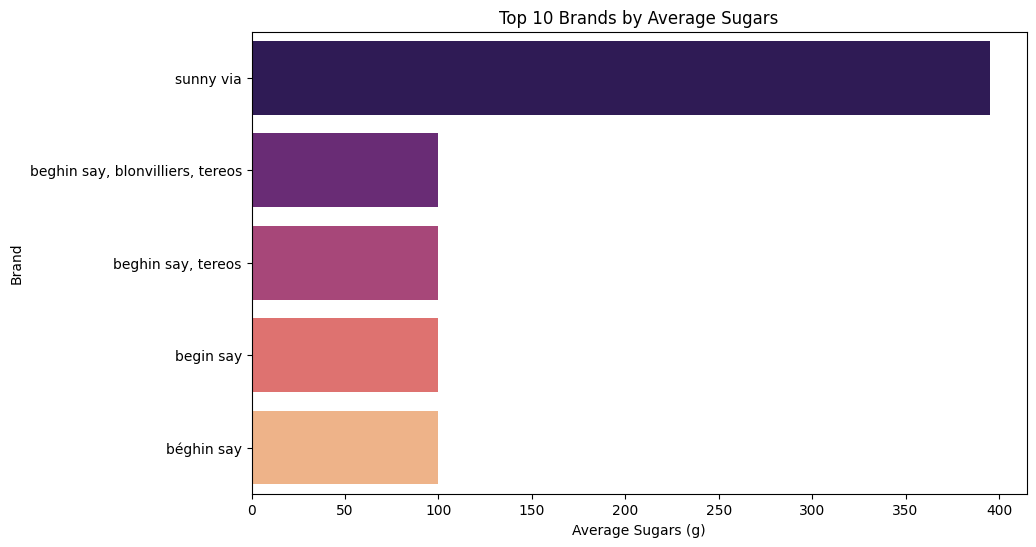

In [133]:
# Top N bar plots: Brands with highest average sugars (Top 10)
top_avg_sugars = df.groupby('brand')['sugars_value'].mean().nlargest(5)
plt.figure(figsize=(10,6))
sns.barplot(x=top_avg_sugars.values, y=top_avg_sugars.index, palette='magma')
plt.title('Top 10 Brands by Average Sugars')
plt.xlabel('Average Sugars (g)')
plt.ylabel('Brand')
plt.show()